In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('cleaned_bank.csv')

In [6]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.rename(columns = {'y':'Purchased'}, inplace = True)

In [8]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Purchased
4240,45,admin.,married,secondary,no,-547,yes,no,unknown,3,jun,214,2,-1,0,unknown,no
1368,37,self-employed,single,tertiary,no,556,no,no,unknown,17,jun,200,2,-1,0,unknown,no
3241,48,technician,married,secondary,no,5,no,no,unknown,9,jun,65,6,-1,0,unknown,no


In [9]:
df.shape

(4521, 17)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Purchased'],
      dtype='object')

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Purchased    object
dtype: object

In [12]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  Purchased  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [14]:
df.isna().sum().any()

False

In [15]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool>

In [16]:
catgorical_column = df.select_dtypes(include = 'object').columns
print(catgorical_column)

numerical_column = df.select_dtypes(include = 'int').columns
print(numerical_column)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Purchased'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,Purchased
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


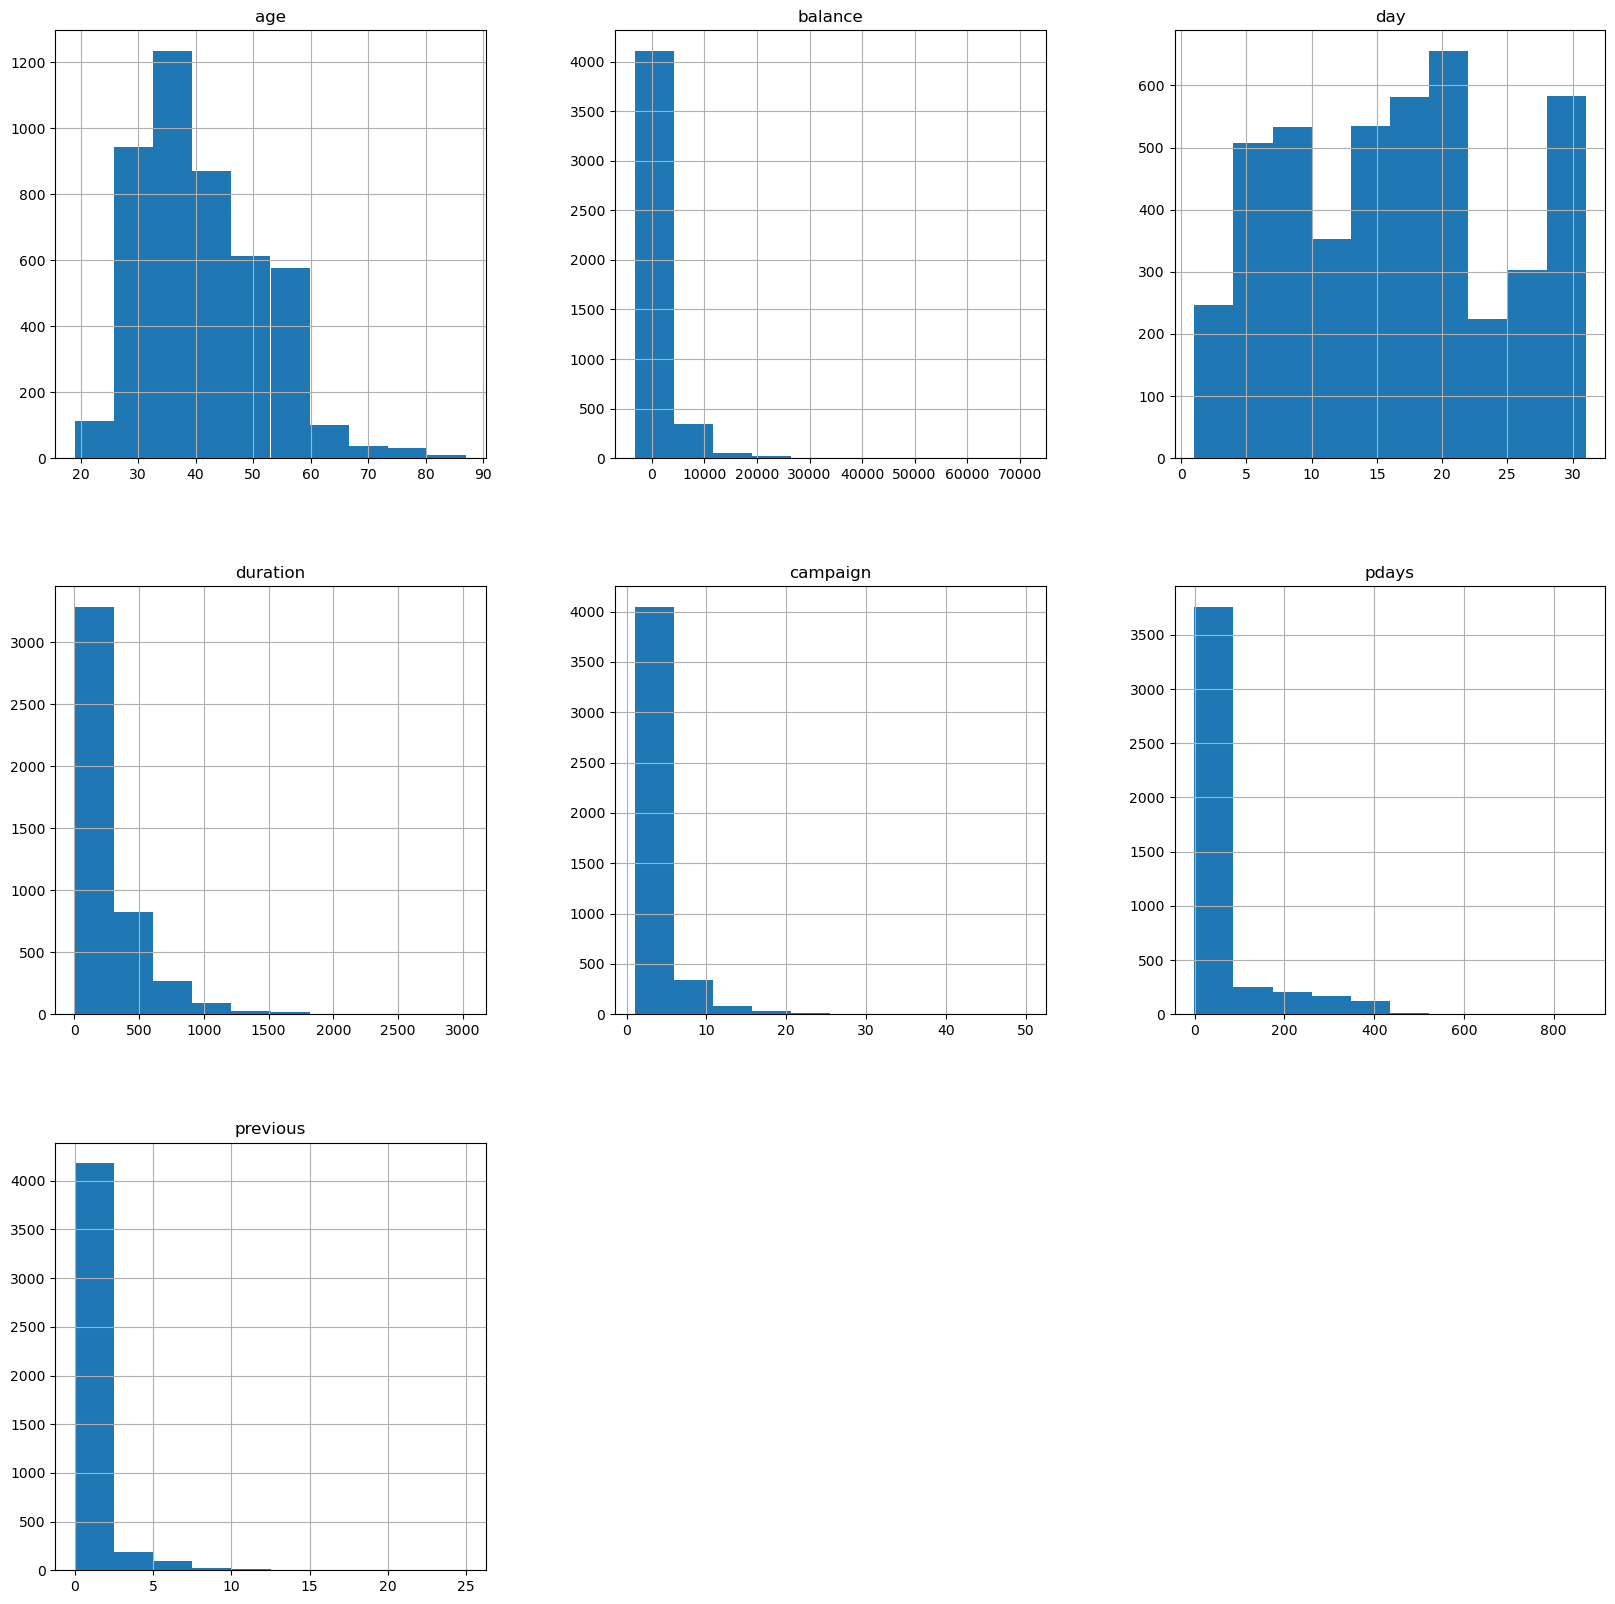

In [19]:
import matplotlib.pyplot as plt
#To verify the distribution
df.hist(figsize =(20,20))
plt.show()

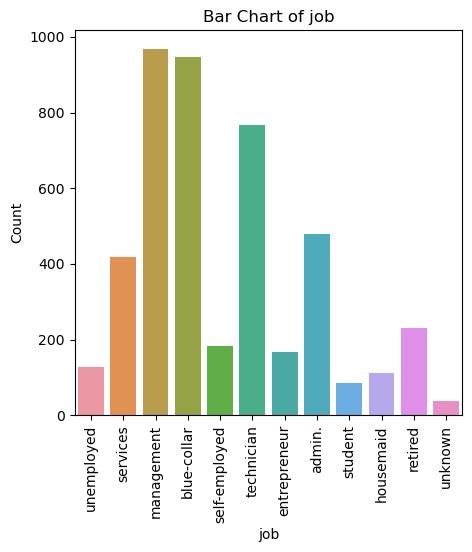

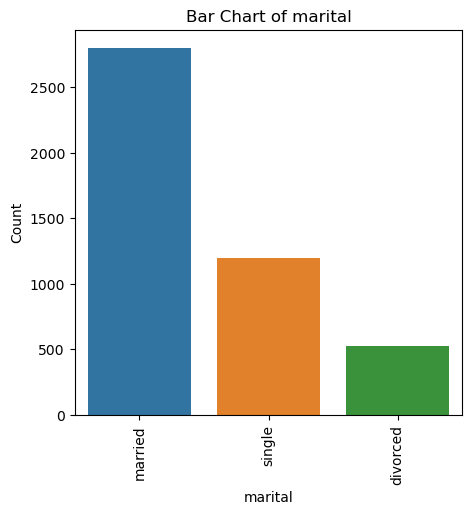

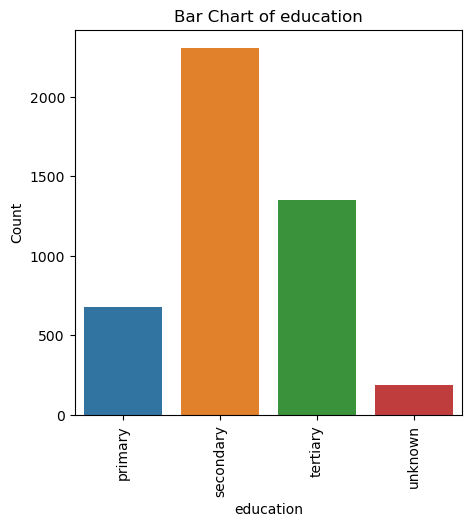

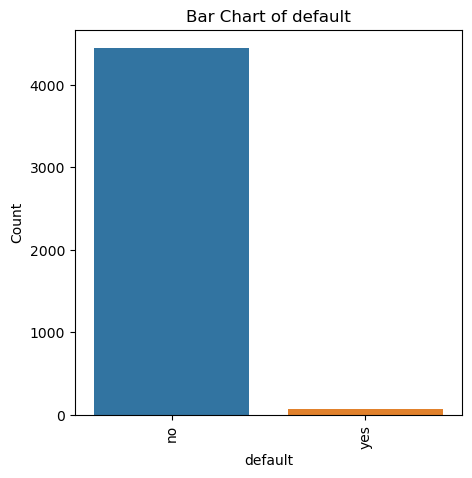

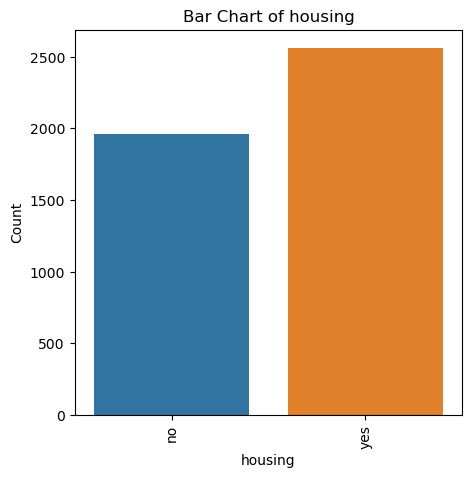

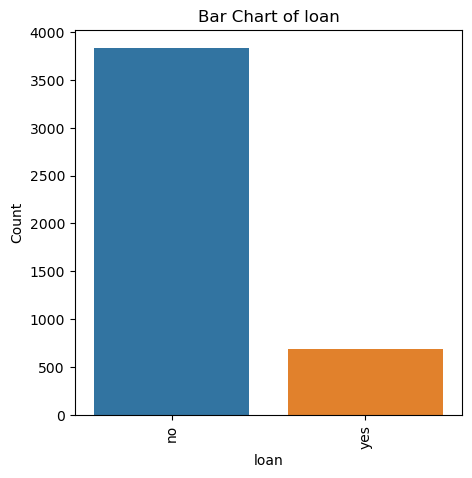

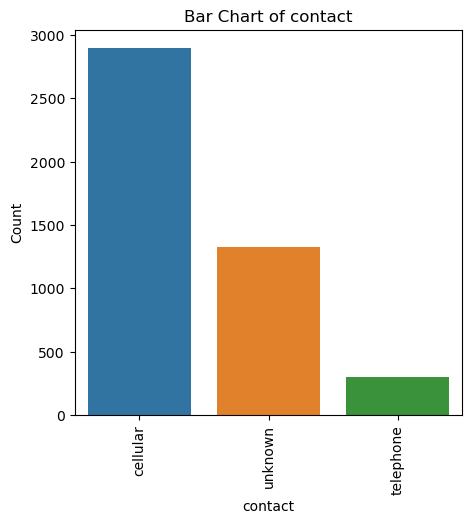

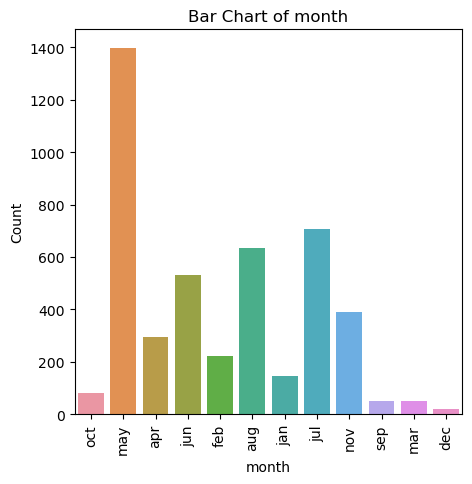

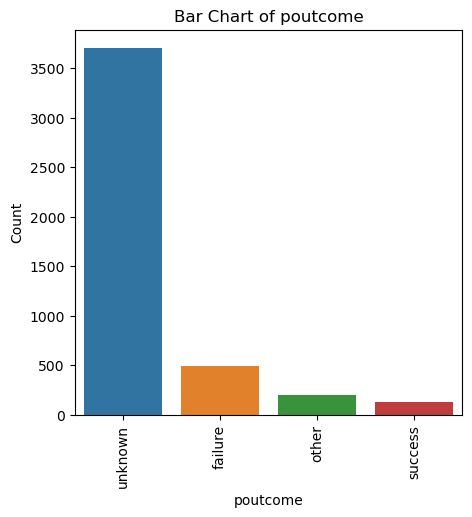

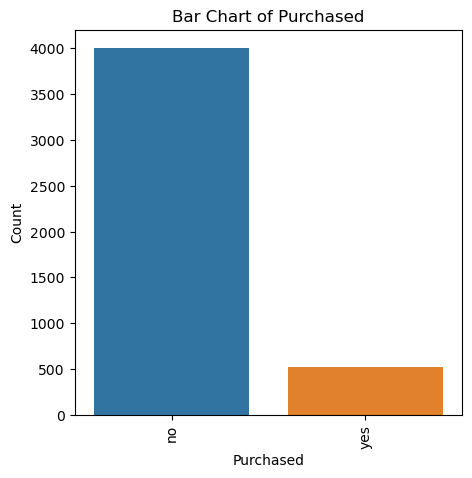

In [20]:
# distribution of categorical columns
import seaborn as sns
for i in catgorical_column :
    plt.figure(figsize = (5,5))
    sns.countplot(x = i , data = df )
    plt.title(f'Bar Chart of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)

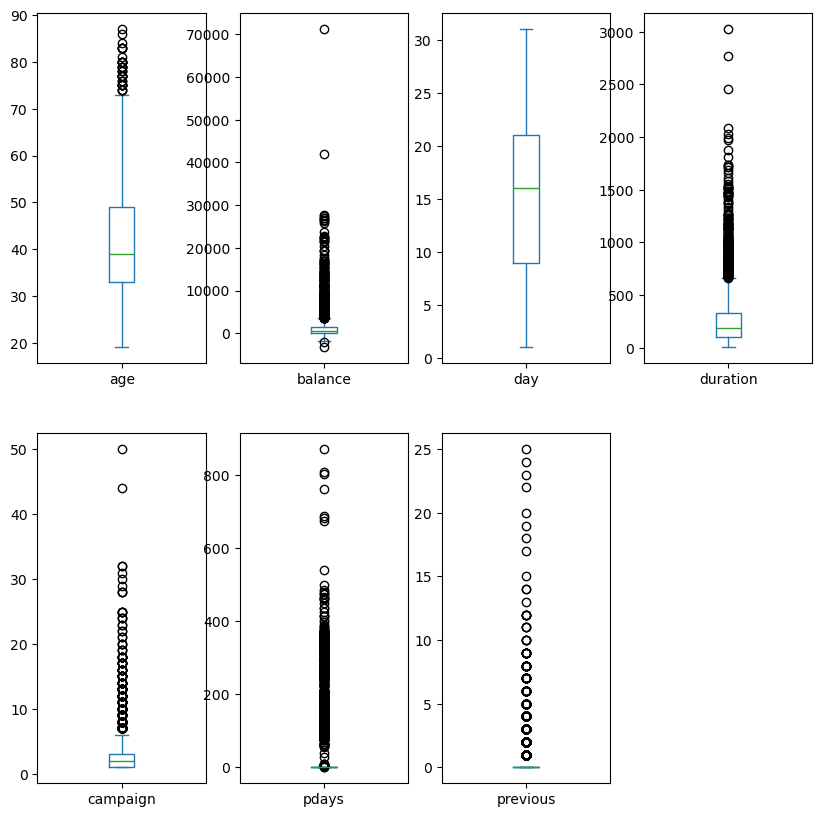

In [21]:
df.plot(kind = 'box' , subplots = True , layout = (2,4) , figsize = (10,10))
plt.show()

In [22]:
try:
    corr1 = df.corr()
    print(corr1)
except ValueError :
    print("Error")

Error


In [23]:
#To convet all the catogical values to numrical values
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
df_encoded = df. apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Purchased
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Purchased'],
      dtype='object')

In [25]:
 df_encoded['Purchased'].value_counts()

Purchased
0    4000
1     521
Name: count, dtype: int64

In [26]:
x = df_encoded.drop('Purchased' , axis =1) 
y = df_encoded['Purchased']
print(x.shape,y.shape)
print(type(x))
print(type(y))

(4521, 16) (4521,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.24 , random_state = 1)


In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_predicton):
    acc = accuracy_score(y_test,y_predicton)
    print(f"Accuracy Score is {acc}")
    cm = confusion_matrix(y_test,y_predicton)
    print(f"confusion matrix {cm}")
    cr =  classification_report(y_test,y_predicton)
    print(f"Classification Reoprt {cr}")
def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print(f"Train Score {train_score}")
    print(f"Test Score {test_score}")
    

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 5 , min_samples_split = 10 )
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [59]:
dt_predict = dt . predict(x_test)
print(dt_predict)

[0 0 0 ... 0 0 0]


In [60]:
eval_model(y_test,dt_predict)

Accuracy Score is 0.8821362799263351
confusion matrix [[913  38]
 [ 90  45]]
Classification Reoprt               precision    recall  f1-score   support

           0       0.91      0.96      0.93       951
           1       0.54      0.33      0.41       135

    accuracy                           0.88      1086
   macro avg       0.73      0.65      0.67      1086
weighted avg       0.86      0.88      0.87      1086



In [61]:
mscore(dt)

Train Score 0.9225618631732169
Test Score 0.8821362799263351


In [70]:
cn = x_train.dtypes
print(list(cn))
rn = ['yes','no']
print(rn)

[dtype('int64'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('int64'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('int64'), dtype('int32'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int32')]
['yes', 'no']


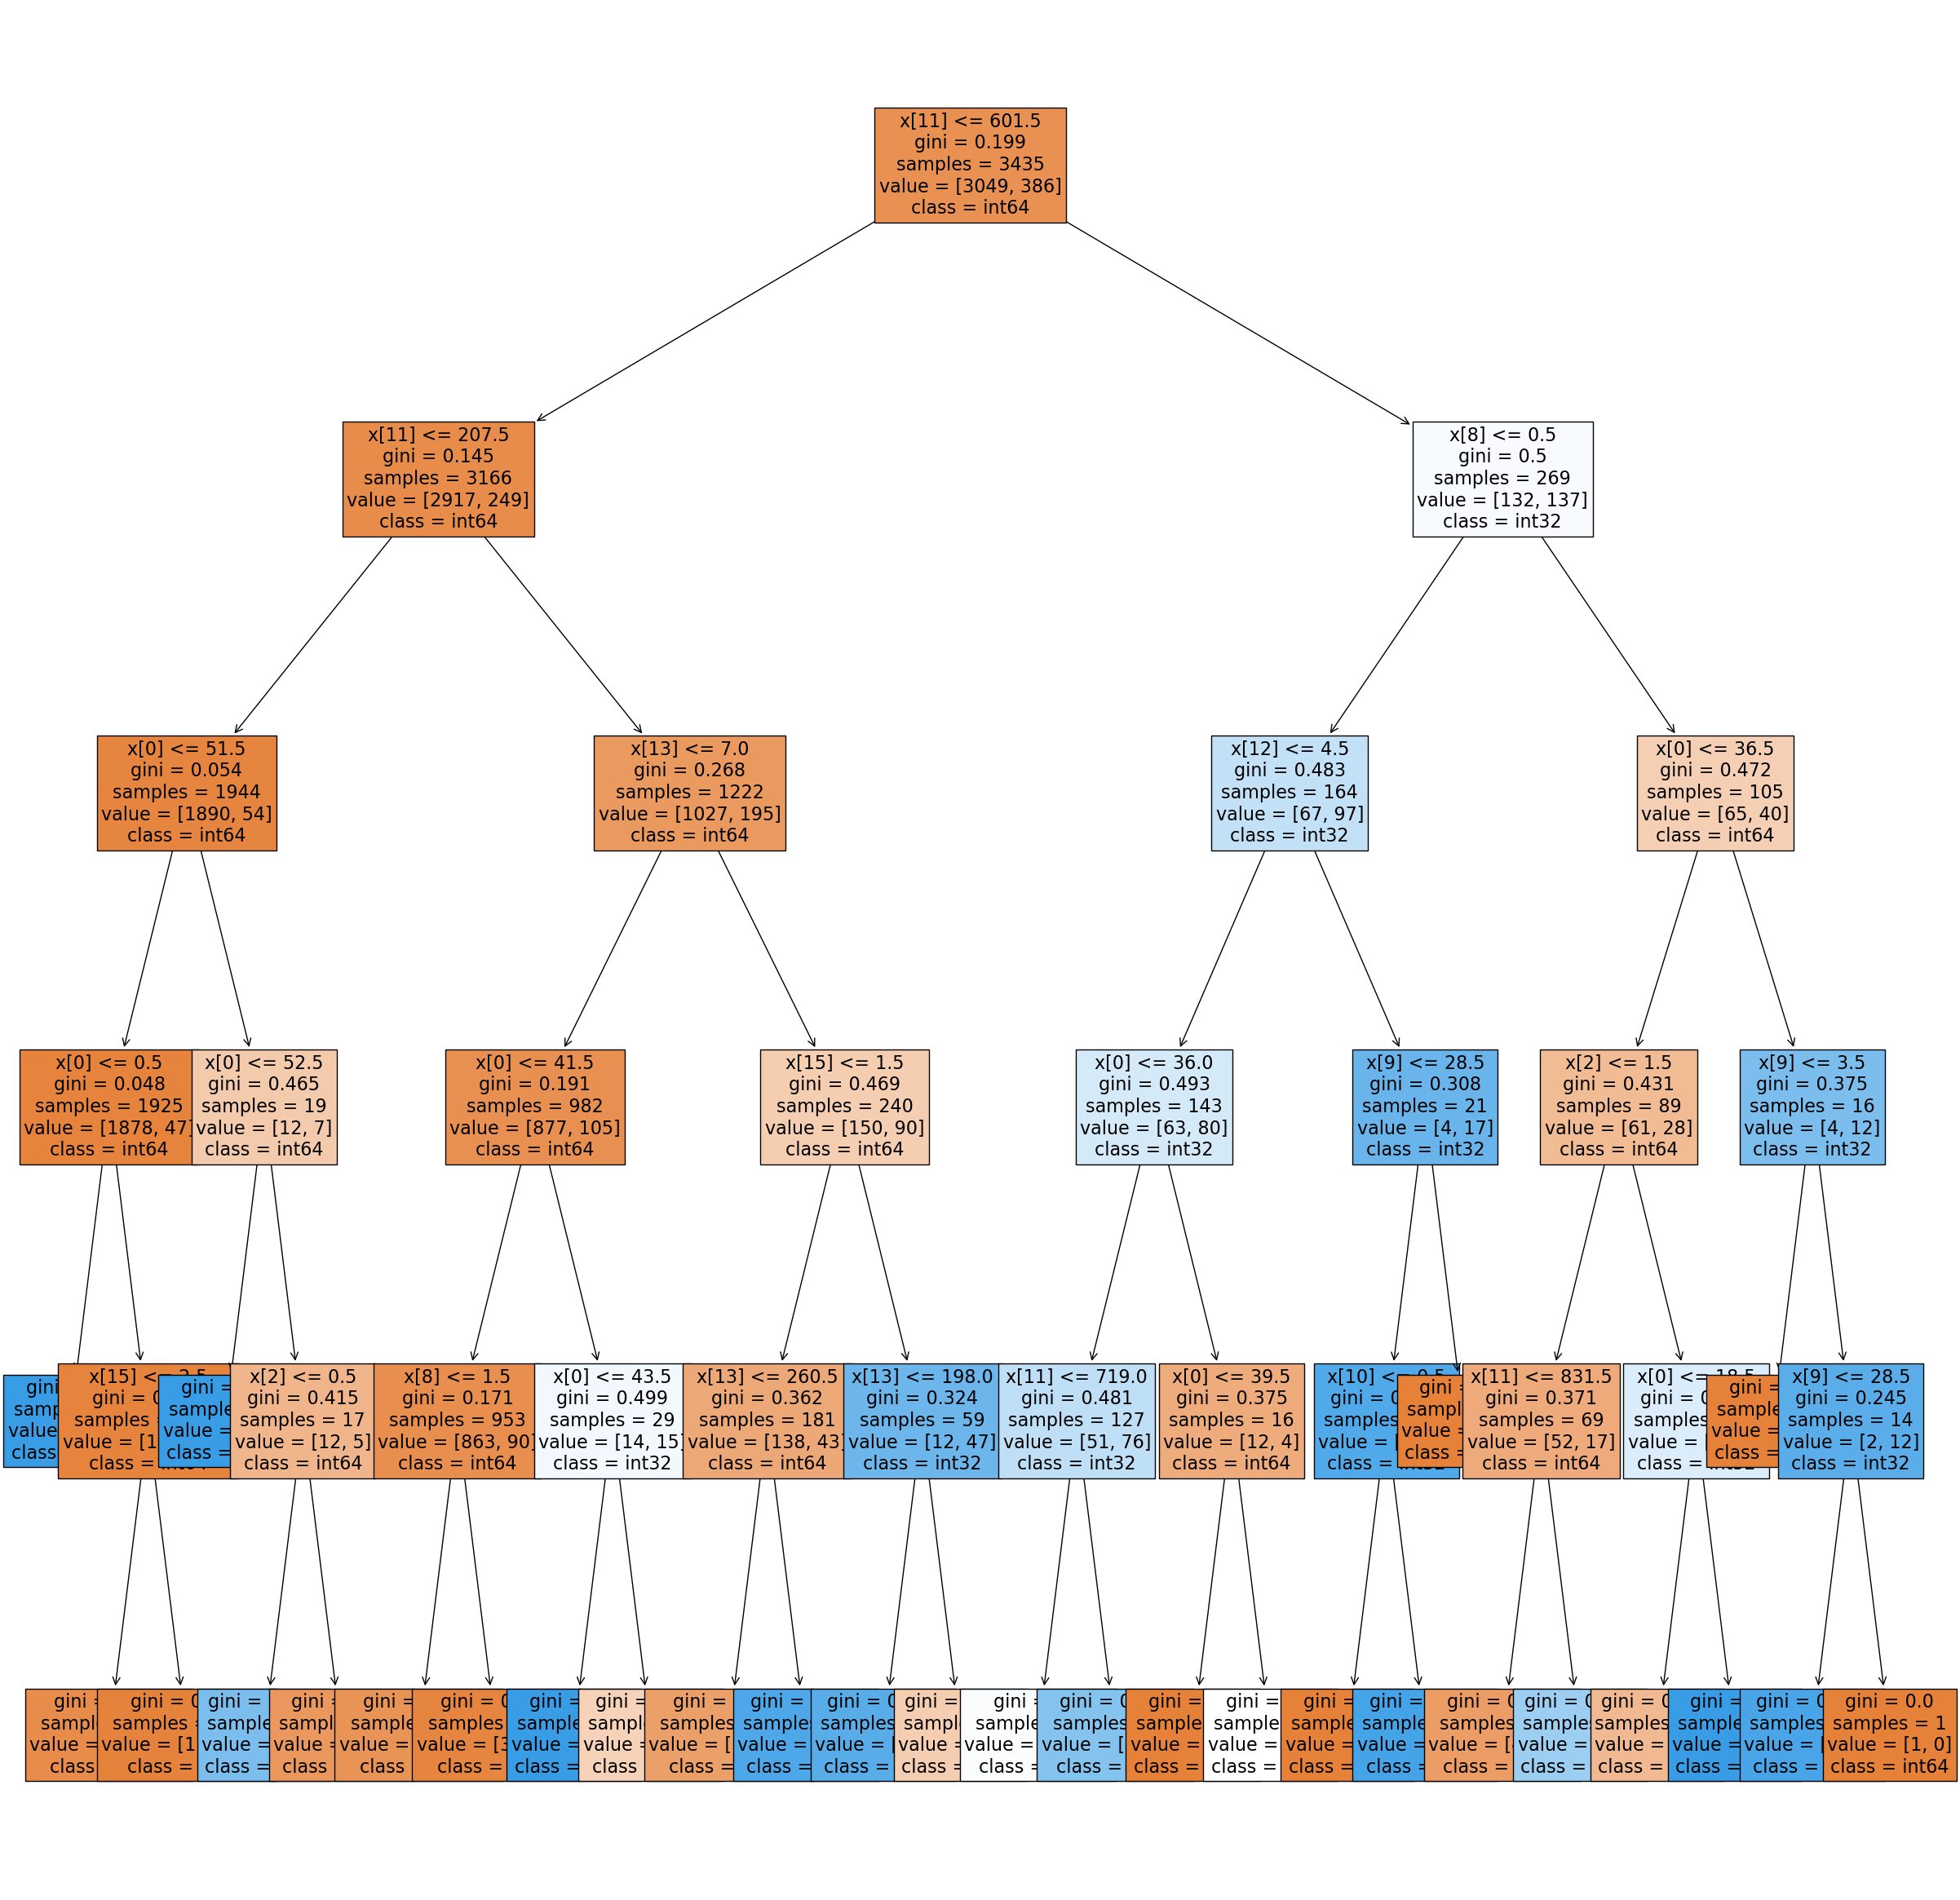

In [87]:
from sklearn.tree import plot_tree
cn = [str(name) for name in cn]

plt.figure(figsize = (30,30))
plot_tree(dt,class_names=cn, filled=True , fontsize=16)
plt.show()

In [62]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5 , min_samples_split = 10)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [64]:
dt_predict_entropy = dt_entropy.predict(x_test)

In [65]:
eval_model(y_test,dt_predict_entropy)

Accuracy Score is 0.8766114180478821
confusion matrix [[907  44]
 [ 90  45]]
Classification Reoprt               precision    recall  f1-score   support

           0       0.91      0.95      0.93       951
           1       0.51      0.33      0.40       135

    accuracy                           0.88      1086
   macro avg       0.71      0.64      0.67      1086
weighted avg       0.86      0.88      0.87      1086



In [66]:
mscore(dt_entropy)

Train Score 0.9184861717612809
Test Score 0.8766114180478821


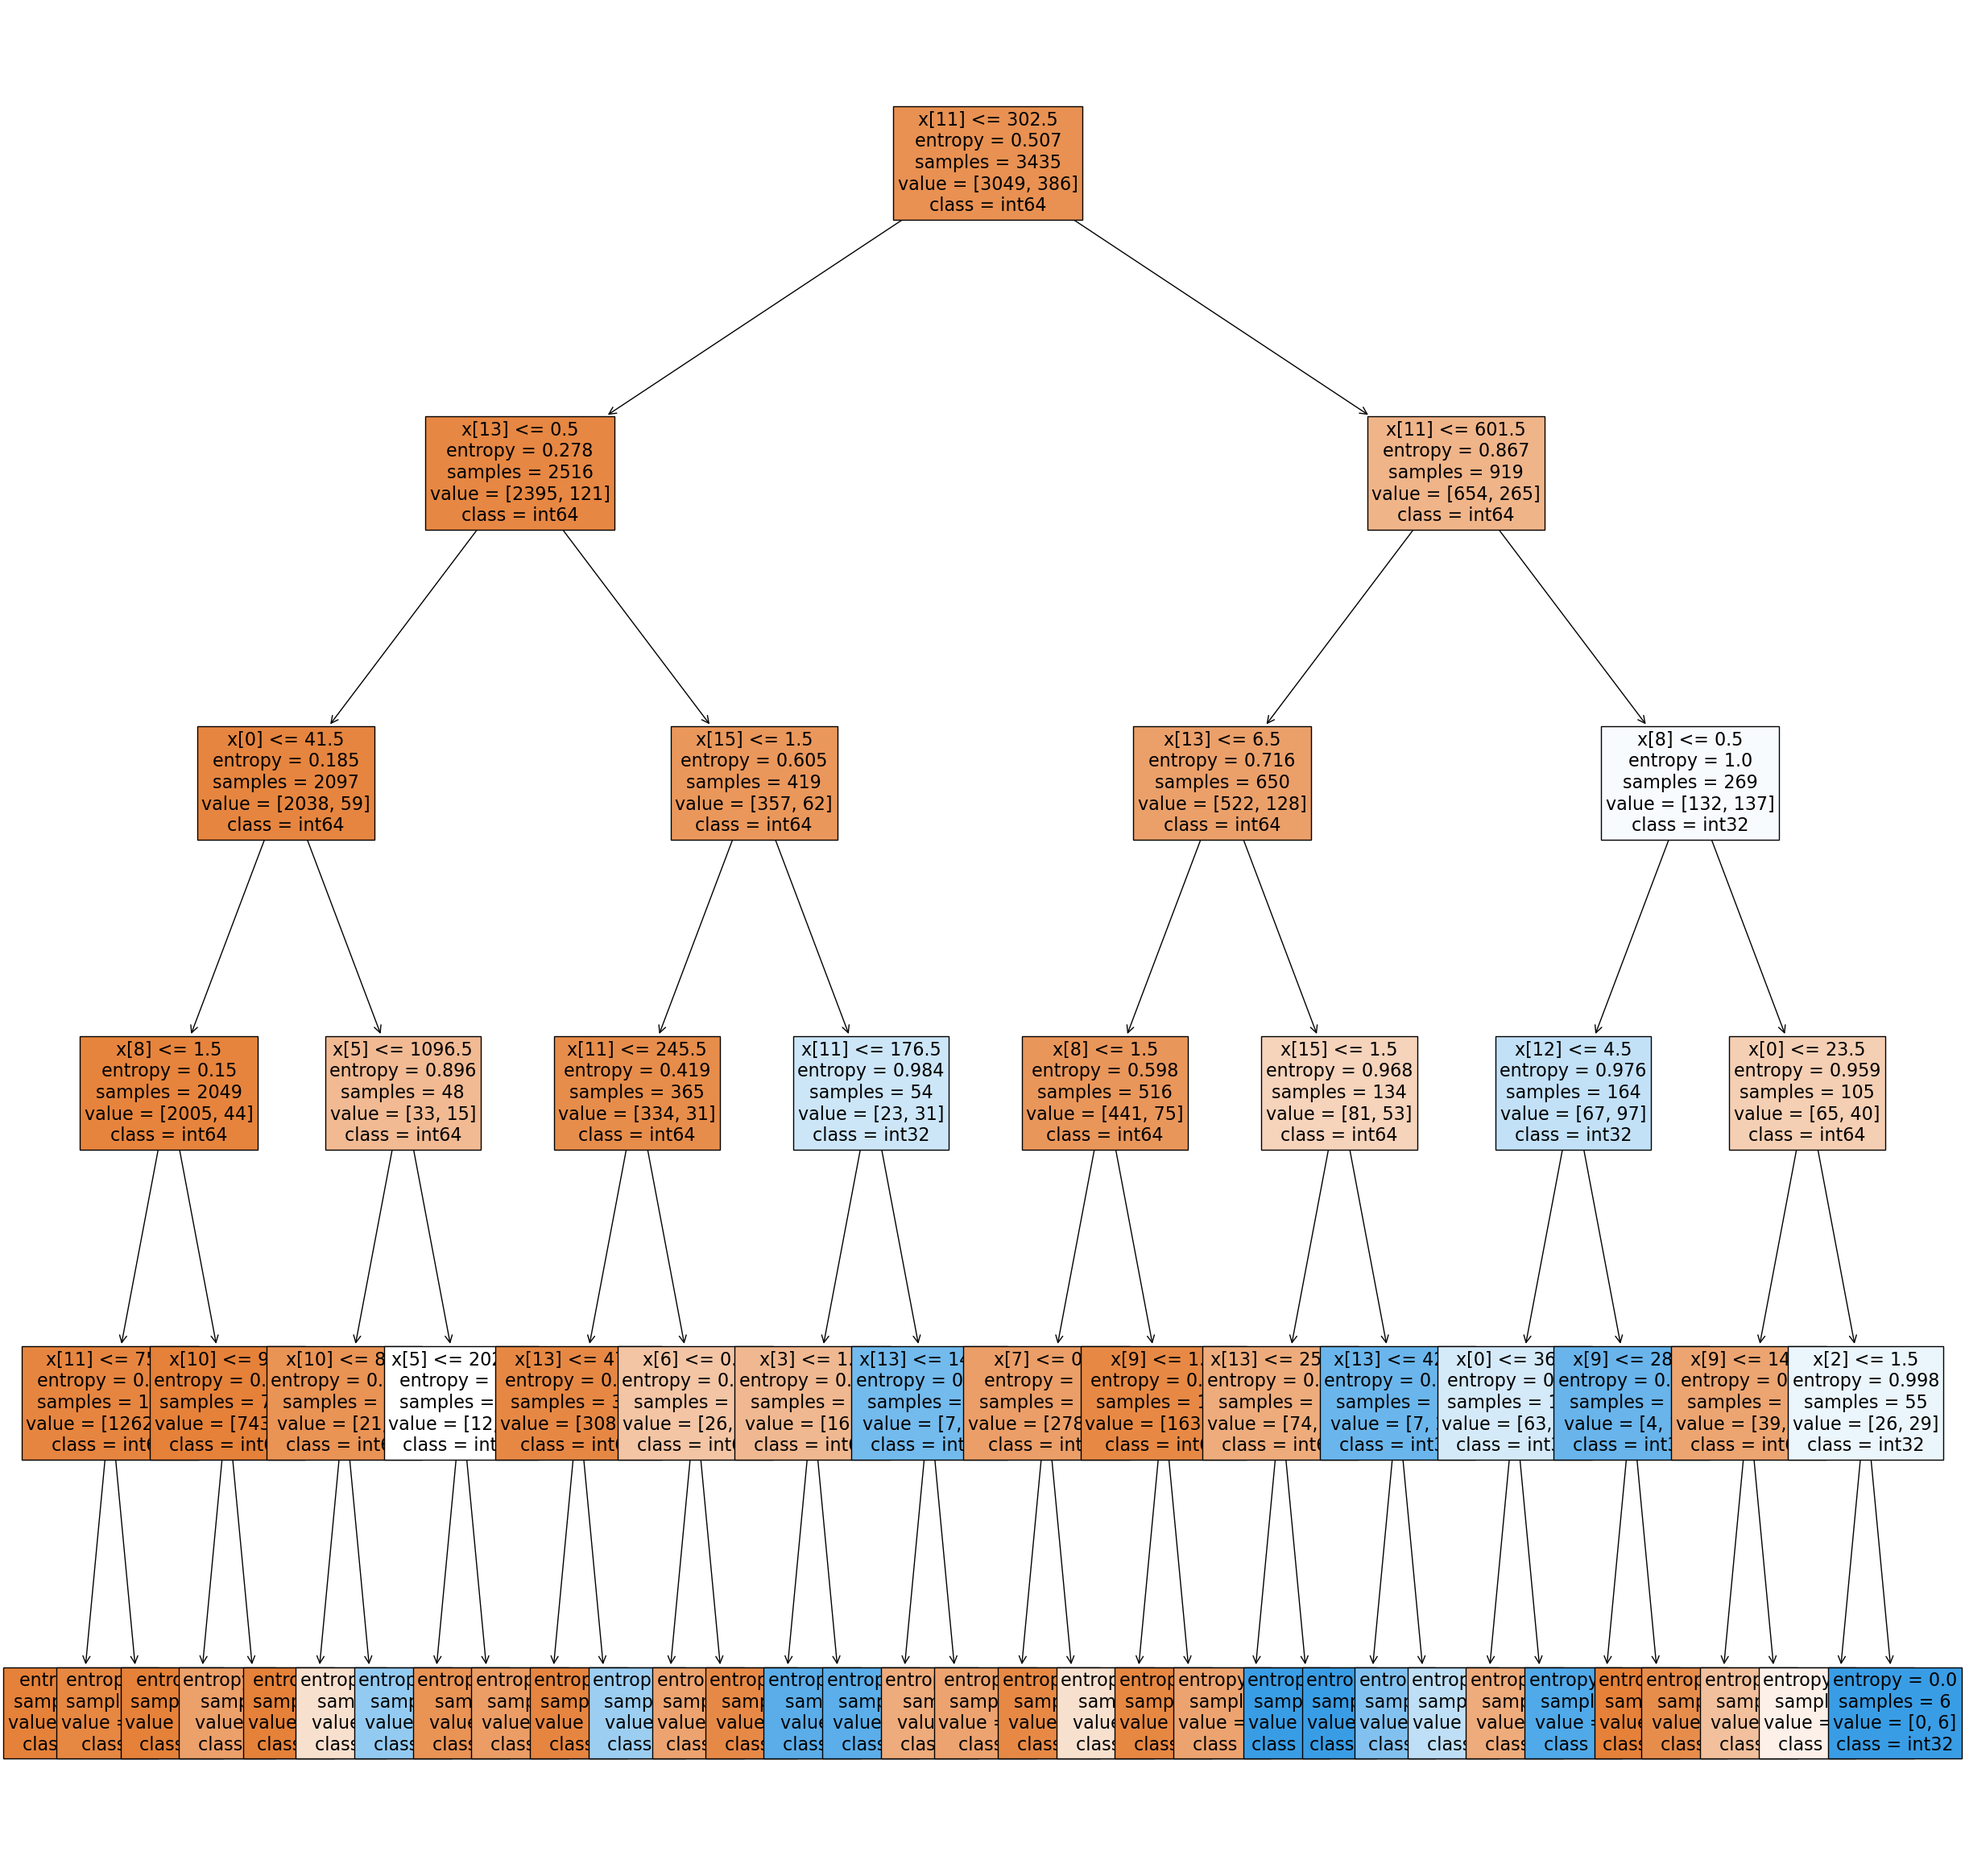

In [85]:
from sklearn.tree import plot_tree
cn = [str(name) for name in cn]

# Plot the decision tree
plt.figure(figsize = (30,30))
plot_tree(dt_entropy, class_names=cn, filled=True , fontsize=16)
plt.show()